In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [4]:
data_car=pd.read_csv('C:\AD_TASK3\Regressionlineal\CAR details v33.csv')
data_car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
data_car.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
data_car.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
#Se obtienen las modas de los datos mileage, engine, max_power y torque, y para la variable seats se obtienen la media (promedio)
mod_mileage = data_car['mileage'].mode()[0]
mod_engine = data_car['engine'].mode()[0]
mod_maxpower = data_car['max_power'].mode()[0]
mod_torque = data_car['torque'].mode()[0]
mean_seats = data_car['seats'].mean()

In [8]:
#Se reemplazan los valores por los resultados obtendidos en la sentencia previa
data_car['mileage'].fillna(mod_mileage, inplace=True)
data_car['engine'].fillna(mod_engine, inplace=True)
data_car['max_power'].fillna(mod_maxpower, inplace=True)
data_car['torque'].fillna(mod_torque, inplace=True)
data_car['seats'].fillna(mean_seats, inplace=True)

In [9]:
#Se verifican que no hayan datos nulos
data_car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

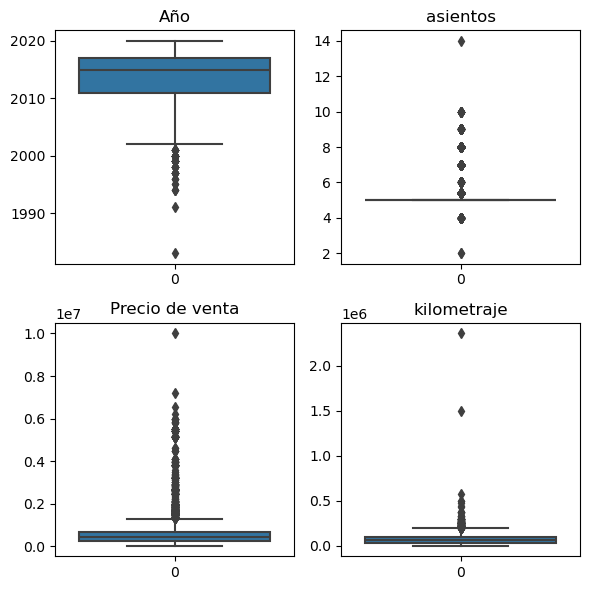

In [10]:
#Se realiza deteccion de datos atípicos
fig, axs = plt.subplots(2,2, figsize = (6,6))
plt1 = sns.boxplot(data_car['year'], ax = axs[0,0])
plt2 = sns.boxplot(data_car['seats'], ax = axs[0,1])
plt3 = sns.boxplot(data_car['selling_price'], ax = axs[1,0])
plt4 = sns.boxplot(data_car['km_driven'], ax = axs[1,1])
#plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt1.set_title('Año')
plt2.set_title('asientos')
plt3.set_title('Precio de venta')
plt4.set_title('kilometraje')
plt.tight_layout()

In [11]:
#se verifica el automovil con valores mayores a 10 asientos
datos_asientos = data_car[data_car['seats'] > 10]
datos_asientos

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4575,Tata Winger Deluxe - Flat Roof (Non-AC),2010,235000,50000,Diesel,Individual,Manual,First Owner,10.71 kmpl,1948 CC,90 bhp,190Nm@ 2000-3000rpm,14.0


In [12]:
data_car2 = data_car.drop(['seller_type','torque','name','owner','max_power'],axis=1)
data_car2.head()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,seats
0,2014,450000,145500,Diesel,Manual,23.4 kmpl,1248 CC,5.0
1,2014,370000,120000,Diesel,Manual,21.14 kmpl,1498 CC,5.0
2,2006,158000,140000,Petrol,Manual,17.7 kmpl,1497 CC,5.0
3,2010,225000,127000,Diesel,Manual,23.0 kmpl,1396 CC,5.0
4,2007,130000,120000,Petrol,Manual,16.1 kmpl,1298 CC,5.0


In [13]:
data_car2.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [14]:
data_car2['fuel'] = data_car2['fuel'].replace({'Diesel': 1, 'Petrol': 0,'LPG': 2,'CNG': 3})
data_car2.head()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,seats
0,2014,450000,145500,1,Manual,23.4 kmpl,1248 CC,5.0
1,2014,370000,120000,1,Manual,21.14 kmpl,1498 CC,5.0
2,2006,158000,140000,0,Manual,17.7 kmpl,1497 CC,5.0
3,2010,225000,127000,1,Manual,23.0 kmpl,1396 CC,5.0
4,2007,130000,120000,0,Manual,16.1 kmpl,1298 CC,5.0


In [15]:
data_car2.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [16]:
data_car2['transmission'] = data_car2['transmission'].replace({'Automatic': 1, 'Manual': 0})
data_car2.head()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,seats
0,2014,450000,145500,1,0,23.4 kmpl,1248 CC,5.0
1,2014,370000,120000,1,0,21.14 kmpl,1498 CC,5.0
2,2006,158000,140000,0,0,17.7 kmpl,1497 CC,5.0
3,2010,225000,127000,1,0,23.0 kmpl,1396 CC,5.0
4,2007,130000,120000,0,0,16.1 kmpl,1298 CC,5.0


In [17]:
data_car2 = data_car2.dropna(axis=0)

def convertToNumber(s:str):
    d = ""
    for i in list(s):
        if i.isdigit():
            d += i
    return eval(d)
    
data_car2["engine"] = data_car2["engine"].apply(convertToNumber)
data_car2["mileage"] = data_car2["mileage"].apply(convertToNumber)
#data_car2["max_power"] = data_car2["max_power"].apply(convertToNumber)

In [18]:
data_car2.head()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,seats
0,2014,450000,145500,1,0,234,1248,5.0
1,2014,370000,120000,1,0,2114,1498,5.0
2,2006,158000,140000,0,0,177,1497,5.0
3,2010,225000,127000,1,0,230,1396,5.0
4,2007,130000,120000,0,0,161,1298,5.0


In [19]:
data_car_corr = data_car2[['year','selling_price','km_driven','fuel','transmission','mileage','engine','seats']]
data_car_corr.corr()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,seats
year,1.000000,0.414092,-0.418006,0.036397,0.244707,0.267329,0.035851,-0.008623
selling_price,0.414092,1.000000,-0.225534,0.163560,0.588845,0.109101,0.458345,0.041161
km_driven,-0.418006,-0.225534,1.000000,0.248681,-0.201229,-0.087422,0.198911,0.225172
fuel,0.036397,0.163560,0.248681,1.000000,-0.044866,0.080696,0.416742,0.297625
transmission,0.244707,0.588845,-0.201229,-0.044866,1.000000,0.012297,0.283986,-0.072405
mileage,0.267329,0.109101,-0.087422,0.080696,0.012297,1.000000,-0.025339,-0.016220
engine,0.035851,0.458345,0.198911,0.416742,0.283986,-0.025339,1.000000,0.608864
seats,-0.008623,0.041161,0.225172,0.297625,-0.072405,-0.016220,0.608864,1.000000


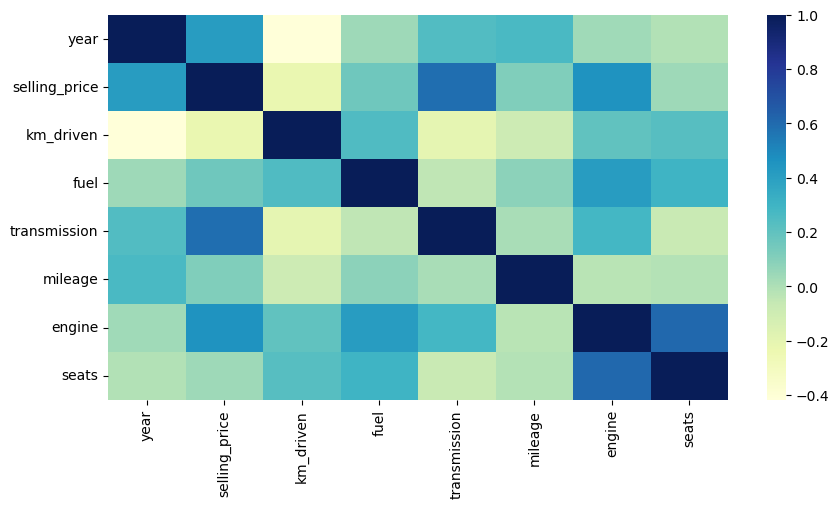

In [20]:
plt.figure(figsize = (10, 5))
sns.heatmap(data_car_corr.corr(), annot = False, cmap="YlGnBu")
plt.show()

In [21]:
data_car2.head()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,seats
0,2014,450000,145500,1,0,234,1248,5.0
1,2014,370000,120000,1,0,2114,1498,5.0
2,2006,158000,140000,0,0,177,1497,5.0
3,2010,225000,127000,1,0,230,1396,5.0
4,2007,130000,120000,0,0,161,1298,5.0


In [22]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = data_car2.drop('selling_price',axis=1) # Se cargan los datos de train sin los datos de la columna precio 
Y = data_car2['selling_price'] # Se cargan los datos de train con los datos de la la columna precio

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

In [23]:
# Verificamos la distribución de clases en Y_train y Y_test
print("Distribución de clases en Y_train:")
print(Y_train.value_counts())
print("\nDistribución de clases en Y_test:")
print(Y_test.value_counts())

Distribución de clases en Y_train:
selling_price
300000     166
350000     164
600000     163
550000     155
450000     154
          ... 
1490000      1
429000       1
1151000      1
31000        1
2064000      1
Name: count, Length: 608, dtype: int64

Distribución de clases en Y_test:
selling_price
300000     61
400000     55
600000     50
550000     49
350000     45
           ..
1650000     1
252000      1
736000      1
329000      1
440000      1
Name: count, Length: 371, dtype: int64


In [24]:
# Construir el modelo de regresión lineal 
modelo_regresion = LinearRegression() # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [25]:
print(Prediccion)

[ 577921.03848898 1185585.77916571 1412682.283301   ...  185758.75119665
  360628.59556361   80653.45781527]


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular métricas de regresión
mse = mean_squared_error(Y_test, Prediccion)
mae = mean_absolute_error(Y_test, Prediccion)
r2 = r2_score(Y_test, Prediccion)

# Mostrar las métricas
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 291629758316.5773
Mean Absolute Error (MAE): 294060.8550416921
R-squared (R2): 0.5583892600330896


In [27]:
modelo_regresion.score(X_train,Y_train)

0.5619404583124413

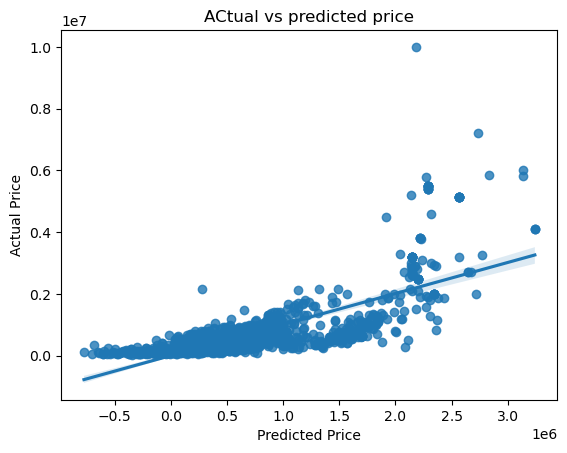

In [28]:
sns.regplot(x=Prediccion, y=Y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()